<a href="https://colab.research.google.com/github/LilyHeAsamiko/Kepler-Predictor-Corrector-Algorithm/blob/main/Kepler_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! pip install

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from numpy import array,arange
# Constants
m = 9.1094e-31     # Mass of electron
hbar = 1.0546e-34  # Planck's constant over 2*pi
e = 1.6022e-19     # Electron charge
L = 5.2918e-11     # Bohr radius
N = 1000
h = L/N

# Potential function
def V(x):
    return 0.0

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)

    for x in arange(0,L,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/1000
rr = []
Er = []
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    rr.append(psi2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    Er.append(E2)

print("E =",E2/e,"eV")
print(rr)
print(Er)

E = 134.28637169369105 eV
[5.2272161579438944e-11, 1.3686307647244209e-11, 5.3049212158378845e-12, 1.1112569883778003e-12, 1.2970720467377272e-13, 3.866933379260459e-15, 1.4130775280613555e-17]
[1.3127930593896974e-17, 1.772754570103909e-17, 2.0638829647467564e-17, 2.1410275441681793e-17, 2.151221838862766e-17, 2.15153509834661e-17, 2.151536247276318e-17]


In [32]:
import numpy
from numpy.lib.arraysetops import ediff1d
#as described within the BornOppenheimer approximation (i.e., with m = me and
#the Coulombic parameter γ = 1 au, so that μ = γ/m = 1 au)
au = 1.49597870e11 #1 au in m
gamma = 1*au
#m = 1*au
mu = gamma/m
Es = np.array(Er)/e
print(Es)

[ 81.93690297 110.64502372 128.8155639  133.6304796  134.26674815
 134.28629998 134.28637169]


[-3.87080537e+13 -5.53424389e+13  4.22427781e+13 -2.28923336e+13
  4.14394984e+13 -4.07007464e+13 -3.32037091e+13]
7


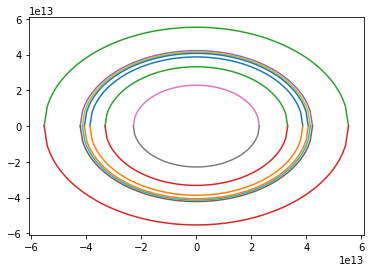

In [37]:
#Circular Motion r0v0 = 0, the eccentricity e = 0Motion. When r0 3 v0 = 0, the eccentricity e = 0

j = np.sqrt(2*abs(Es)/m)
n = j**3/mu
cr = np.cos(n)
cv = np.sin(n)
#suppose r0 = 0, X = 0 the position of the singularity
r0 = 0.1
v0 = np.sqrt(mu/r0)
rt = cr*r0 + cv*v0/n
v = -n*cv*r0 + cr*v0
print(rt)
print(np.size(rt))
for i in range(np.size(rt)):
  x = np.linspace(-rt[i],rt[i],100)
  y1 = np.sqrt(rt[i]**2-x**2)
  y2 = -y1
  plt.plot(x,y1)
  plt.plot(x,y2)


-3.0205325243692e-07
1.5085681420366837e+21
[-4.52570443e+21 -3.01055291e+21 -1.49540140e+21  1.97501193e+19
  1.53490163e+21  3.05005315e+21  4.56520466e+21  6.08035618e+21
  7.59550770e+21  9.11065921e+21  1.06258107e+22  1.21409622e+22
  1.36561138e+22  1.51712653e+22  1.66864168e+22  1.82015683e+22
  1.97167198e+22  2.12318713e+22  2.27470228e+22  2.42621744e+22
  2.57773259e+22  2.72924774e+22  2.88076289e+22  3.03227804e+22
  3.18379319e+22  3.33530835e+22  3.48682350e+22  3.63833865e+22
  3.78985380e+22  3.94136895e+22  4.09288410e+22  4.24439925e+22
  4.39591441e+22  4.54742956e+22  4.69894471e+22  4.85045986e+22
  5.00197501e+22  5.15349016e+22  5.30500531e+22  5.45652047e+22
  5.60803562e+22  5.75955077e+22  5.91106592e+22  6.06258107e+22
  6.21409622e+22  6.36561138e+22  6.51712653e+22  6.66864168e+22
  6.82015683e+22  6.97167198e+22  7.12318713e+22  7.27470228e+22
  7.42621744e+22  7.57773259e+22  7.72924774e+22  7.88076289e+22
  8.03227804e+22  8.18379319e+22  8.33530835e+

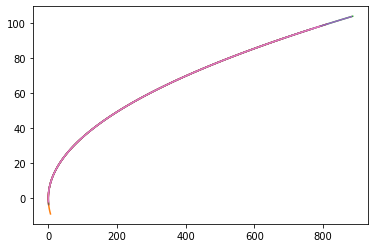

In [50]:
#Parabolic Motion
B = np.dot(L,e)
for i in range(np.size(rt)):
  r0 = rt[i]
  tau0 = r0*v0/mu
  print(tau0)
  p = L**2/mu
  tp = -tau0*(p+mu*tau0**2/3)
  print(tp)
  #t in as
  t = np.linspace(0,50e21,100)
  tD = 3*(t-tp)
  print(tD)
  D = tD**2 + p**3/mu
  tau = ((tD+np.sqrt(D))**1/3+(tD-np.sqrt(D))**1/3)*10**(-21)
  r = 0.5*10**(-42)*(p+mu*(tau)**2)
  plt.plot(r,tau)

In [63]:
print(r*10**(-54))

[-1.30307    -1.30306801 -1.30306202 -1.30305204 -1.30303807 -1.3030201
 -1.30299814 -1.30297219 -1.30294225 -1.30290831 -1.30287038 -1.30282845
 -1.30278253 -1.30273261 -1.30267869 -1.30262077 -1.30255886 -1.30249294
 -1.30242302 -1.3023491  -1.30227118 -1.30218925 -1.30210332 -1.30201338
 -1.30191943 -1.30182147 -1.3017195  -1.30161351 -1.30150351 -1.30138949
 -1.30127145 -1.3011494  -1.30102331 -1.30089321 -1.30075908 -1.30062091
 -1.30047872 -1.30033249 -1.30018223 -1.30002793 -1.29986959 -1.2997072
 -1.29954077 -1.29937029 -1.29919576 -1.29901718 -1.29883453 -1.29864783
 -1.29845707 -1.29826223]


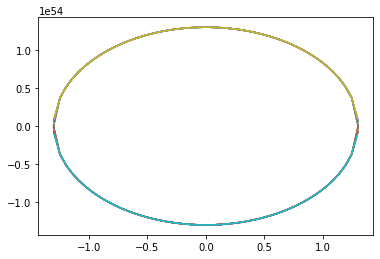

In [64]:
#initial to final
for i in np.linspace(0,49,10):
  x = np.linspace(-r[int(i)],r[int(i)],50)
  y1 = np.sqrt(r[0]**2-x**2)
  y2 = -y1
  plt.plot(x*10**(-54),y1)
  plt.plot(x*10**(-54),y2)

<ipython-input-61-3d8182f610c9>:4: RuntimeWarning: invalid value encountered in sqrt
  y1 = np.sqrt(r[49]**2-x**2)


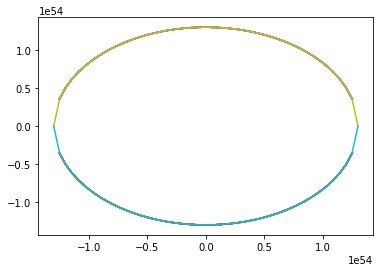

In [61]:
#final
for i in np.linspace(0,49,10):
  x = np.linspace(-r[int(i)],r[int(i)],50)
  y1 = np.sqrt(r[49]**2-x**2)
  y2 = -y1
  plt.plot(x,y1)
  plt.plot(x,y2)

<ipython-input-7-b48598e82eb7>:3: RuntimeWarning: invalid value encountered in sqrt
  y1 = np.sqrt(r**2-x**2)


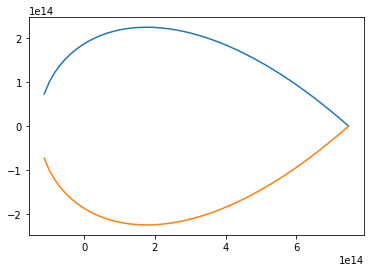

In [ ]:
#final
x = np.linspace(-r[99],r[99],100)
y1 = np.sqrt(r**2-x**2)
y2 = -y1
plt.plot(x,y1)
plt.plot(x,y2)

10.482836100362002
14.705994820823523
1598321453864483.0
[-1.30307000e+54 -1.30306801e+54 -1.30306202e+54 -1.30305204e+54
 -1.30303807e+54 -1.30302010e+54 -1.30299814e+54 -1.30297219e+54
 -1.30294225e+54 -1.30290831e+54 -1.30287038e+54 -1.30282845e+54
 -1.30278253e+54 -1.30273261e+54 -1.30267869e+54 -1.30262077e+54
 -1.30255886e+54 -1.30249294e+54 -1.30242302e+54 -1.30234910e+54
 -1.30227118e+54 -1.30218925e+54 -1.30210332e+54 -1.30201338e+54
 -1.30191943e+54 -1.30182147e+54 -1.30171950e+54 -1.30161351e+54
 -1.30150351e+54 -1.30138949e+54 -1.30127145e+54 -1.30114940e+54
 -1.30102331e+54 -1.30089321e+54 -1.30075908e+54 -1.30062091e+54
 -1.30047872e+54 -1.30033249e+54 -1.30018223e+54 -1.30002793e+54
 -1.29986959e+54 -1.29970720e+54 -1.29954077e+54 -1.29937029e+54
 -1.29919576e+54 -1.29901718e+54 -1.29883453e+54 -1.29864783e+54
 -1.29845707e+54 -1.29826223e+54]
1.1513202584554643e-29
0.7853981633974483
[0.         0.00400713 0.00801427 0.0120214  0.01602853 0.02003567
 0.0240428  0.028049

<ipython-input-55-023424289f18>:39: RuntimeWarning: invalid value encountered in true_divide
  tp = -(eps0-e*np.sin(eps0))/n


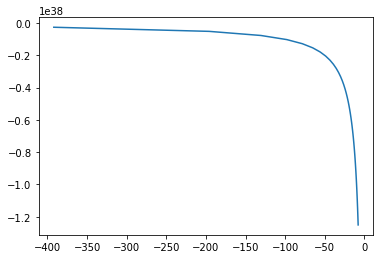

In [55]:
#Elliptic and Hyperbolic Motion
k = -2*h/mu
j = np.sqrt(2*abs(h))
tau = ((tD+np.sqrt(D))**1/3+(tD-np.sqrt(D))**1/3)
eps000 = j*tau
#here we use 0=<e<=1, 0=<M<=np.pi Eplliptic Kepler Equation
unit = 1e18
q = 2*(1-e*unit)/(e*unit)
print(q)
M = np.pi/4
r = 3*M/(e*unit)
print(r)
w = 1
cv = ((r**2+q**3)**5+r)**1/3
print(cv)
eps00 = 2*r/(cv**2+q+(q/w)**2)
eps01 = M
epsa0 = (M**2+np.dot((np.pi-M),eps00))/np.pi
#if M>0, e >=1 Hyperbollic Kepler
#q = 2*(e-1)/e
#r = 3*M/e
#M = -eps+e*np.sinh(eps)
#L = M/e
#g = 1/e
#eps01 = np.sinh(L)
#epsa0 = (np.dot(M,sinh(L)+eps00)/(M+1)

eps = np.linspace(0,epsa0,50)
cv = np.sinh(eps)
cr = np.cosh(eps)
r = (1-e*cr*unit)/k
print(r)
v = (-mu*cv/j*e+cr*B)/(e*r)
n = -eps+e*np.sinh(eps)
mue = mu
y = n*r0*v0/(k*mue)
x = (1-n*r0/j)/e
eps0 = np.arctan2(y,x)
tp = -(eps0-e*np.sin(eps0))/n
print(eps00)
print(eps01)
print(eps)
print(v)
print(n)
print(x)
print(y)
#plt.plot(x,y)
#plt.plot(tp,y)

plt.plot(tp,x)